In [41]:
import re
import nltk
from nltk.tokenize import word_tokenize

# Убедитесь, что вы скачали необходимые ресурсы
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_ru = stopwords.words('russian')


# Функция для предобработки текста
def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    # Удаление знаков препинания
    text = re.sub(r'[^\w\s]', '', text)
    # Токенизация
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stopwords_ru]
    return filtered_tokens

# Загрузка текста из файла
with open('C:\\Users\\Дом\\Documents\\project\\ml_innopolis_home_work\\CrimeAndPunishment.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Предобработка текста
tokens = preprocess_text(text)
tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Дом\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Дом\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['преступление',
 'наказание',
 'роман',
 'шести',
 'частях',
 'эпилогом',
 'часть',
 'первая',
 'i',
 'начале',
 'июля',
 'чрезвычайно',
 'жаркое',
 'время',
 'вечер',
 'молодой',
 'человек',
 'вышел',
 'своей',
 'каморки',
 'которую',
 'нанимал',
 'жильцов',
 'м',
 'переулке',
 'улицу',
 'медленно',
 'нерешимости',
 'отправился',
 'мосту',
 'благополучно',
 'избегнул',
 'встречи',
 'своею',
 'хозяйкой',
 'лестнице',
 'каморка',
 'приходилась',
 'самою',
 'кровлей',
 'высокого',
 'пятиэтажного',
 'дома',
 'походила',
 'шкаф',
 'квартиру',
 'квартирная',
 'хозяйка',
 'которой',
 'нанимал',
 'каморку',
 'обедом',
 'прислугой',
 'помещалась',
 'одною',
 'лестницей',
 'ниже',
 'отдельной',
 'квартире',
 'каждый',
 'выходе',
 'улицу',
 'непременно',
 'проходить',
 'мимо',
 'хозяйкиной',
 'кухни',
 'настежь',
 'отворенной',
 'лестницу',
 'каждый',
 'молодой',
 'человек',
 'проходя',
 'мимо',
 'чувствовал',
 'какоето',
 'болезненное',
 'трусливое',
 'ощущение',
 'которого',
 'стыдился',
 'ко

In [4]:
!pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 262.6 kB/s eta 0:01:32
   ---------------------------------------- 0.0/24.0 MB 262.6 kB/s eta 0:01:32
   ---------------------------------------- 0.1/24.0 MB 328.2 kB/s eta 0:01:13
   ---------------------------------------- 0.1/24.0 MB 357.2 kB/s eta 0:01:08
   ---------------------------------------- 0.1/24.0 MB 403.5 kB/s eta 0:01:00
   ---------------------------------------- 0.1/24.0 MB 450.6 kB/s eta 0:00:54
   ---------------------------------------- 0.2/24.0 MB 482.7 kB/s eta 0:00:50
   ---------------------------------------- 0.2/24.0 MB 499.5 kB/s eta 0:00:48
   ---------------------------------------- 0.2/24.0 MB 518.8 kB/s eta 0:00:46
   ---------------------------------------- 0.2/24.0 MB 529.7 kB/s eta 0:00:45



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
from gensim.models.word2vec import Word2Vec
# vector_size - размерность векторов, которые мы хотим обучить
# window - ширина окна контекста
# min_count - если слово встречается реже, для него не учим модель
model = Word2Vec(sentences=[tokens], vector_size=100, window=2, min_count=1, workers=4)


# Сохранение модели
model.save("word2vec_model.model")

In [61]:
# Обучение модели Word2Vec
model2 = Word2Vec(sentences=[tokens], vector_size=1000, window=5, min_count=5, workers=4)

# Сохранение модели
model2.save("word2vec_model2.model")

In [66]:
'преступление' in model.wv.key_to_index

True

In [67]:
# Пример поиска похожих слов
similar_words = model.wv.most_similar('преступление', topn=10)
print(similar_words)

similar_words2 = model2.wv.most_similar('преступление', topn=10)
print(similar_words2)

[('точнос', 0.3969830274581909), ('сдвинул', 0.37901246547698975), ('стороне', 0.36164695024490356), ('отрезала', 0.3510686755180359), ('камню', 0.35028159618377686), ('касавшемуся', 0.3468986451625824), ('надуть', 0.3452792167663574), ('чистосердечно', 0.33673688769340515), ('проводил', 0.33650726079940796), ('diamanten', 0.3360374867916107)]
[('временем', 0.13425281643867493), ('дело', 0.1318078488111496), ('молодой', 0.1275959461927414), ('старуха', 0.11311954259872437), ('толпы', 0.11222517490386963), ('стала', 0.11001279950141907), ('мало', 0.10963927209377289), ('молчание', 0.10831321030855179), ('ибо', 0.10577122122049332), ('завтра', 0.10505598783493042)]


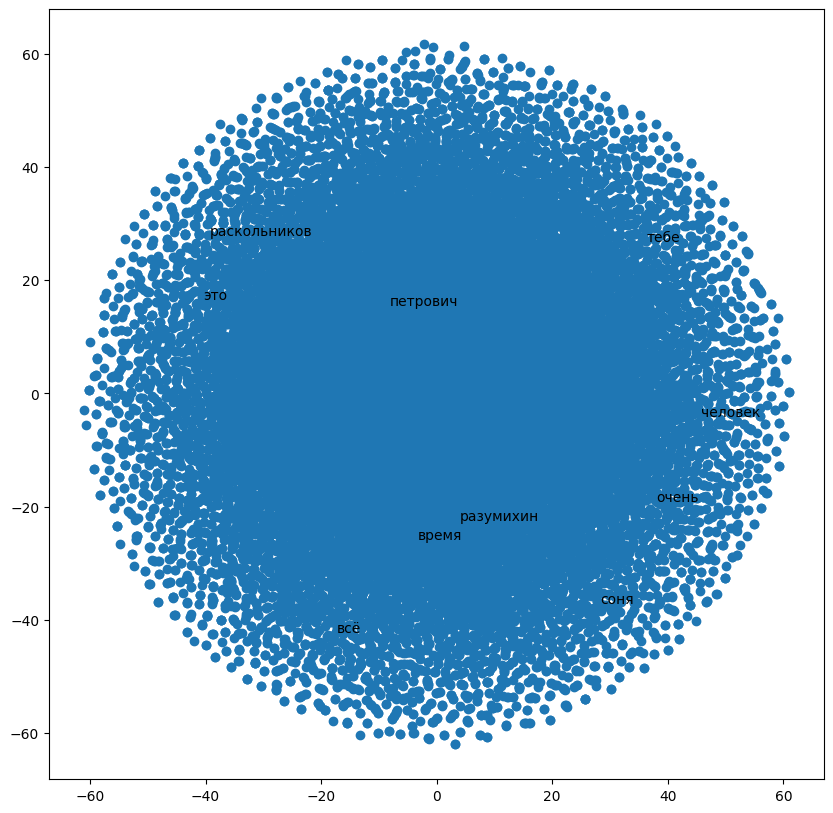

In [68]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Получение векторов слов
words = list(model.wv.key_to_index.keys())
word_vectors = model.wv[words]

# Уменьшение размерности с помощью t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(word_vectors)

# Визуализация
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

for i, word in enumerate(words):
    if i < 10:
        plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]))

plt.show()

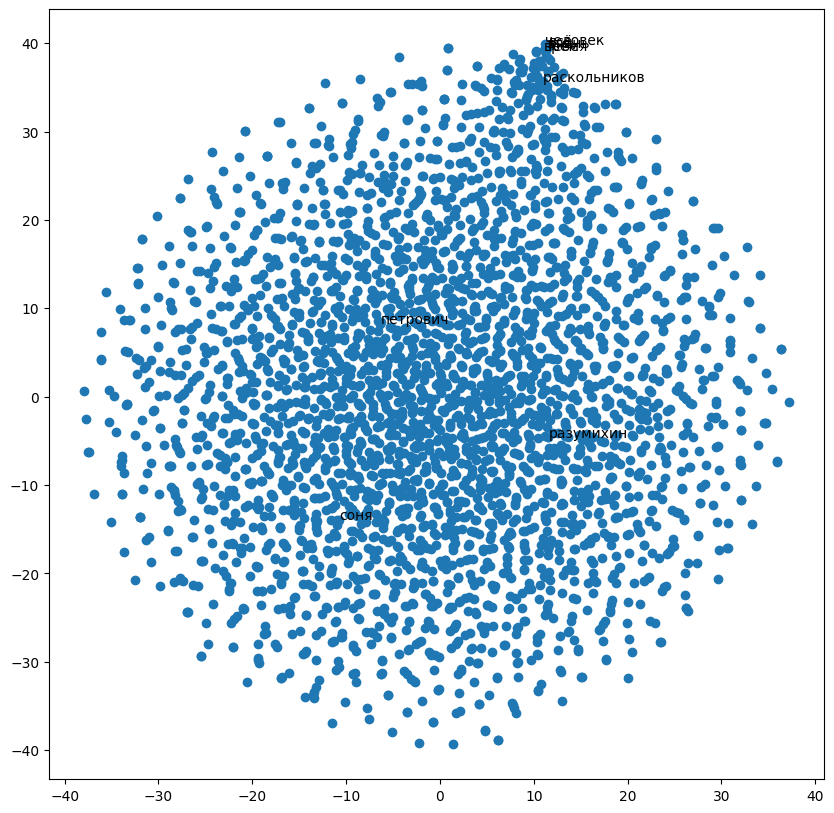

In [70]:
# Получение векторов слов
words2 = list(model2.wv.key_to_index.keys())
word_vectors2 = model2.wv[words2]

# Уменьшение размерности с помощью t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(word_vectors2)

# Визуализация
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

for i, word in enumerate(words):
    if i < 10:
        plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]))
plt.show()

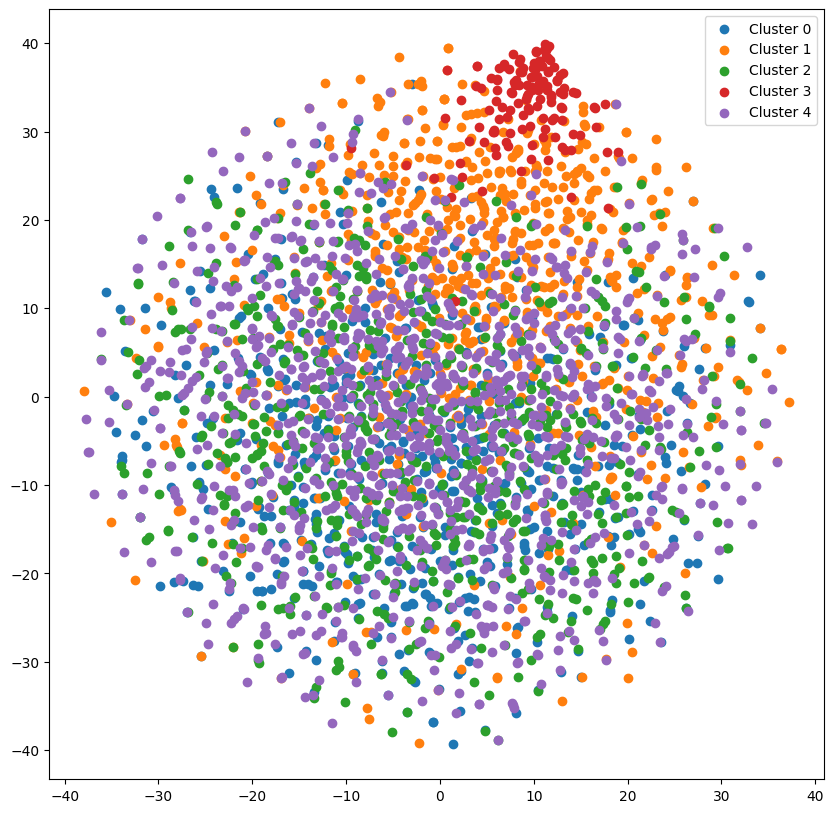

In [74]:
from sklearn.cluster import KMeans

# Кластеризация
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(word_vectors2)

# Получение меток кластеров
labels = kmeans.labels_
labels
# Визуализация кластеров
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.scatter(X_tsne[labels == i, 0], X_tsne[labels == i, 1], label=f'Cluster {i}')

plt.legend()
plt.show()

In [75]:
# Создание словаря для хранения слов по кластерам
clusters = {i: [] for i in range(5)}

# Заполнение словаря словами из соответствующих кластеров
for word, label in zip(words, labels):
    clusters[label].append(word)

# Печать слов для каждого кластера
for cluster, words_in_cluster in clusters.items():
    print(f"Кластер {cluster}: {', '.join(words_in_cluster)}")

Кластер 0: соня, порфирий, александровна, говорю, авдотья, сих, тихо, скоро, стояла, лебезятников, те, идти, глаз, пожалуйста, шел, видно, петра, которой, начала, вашего, романович, двадцать, вон, государь, знали, свидания, третьего, минуты, громко, прощай, самую, очевидно, видимо, миколка, смех, моему, порфирию, одни, возьми, делу, чай, строго, сто, жаль, дворе, желаю, отчаянии, пора, живет, улыбкой, принять, последний, ваши, резко, никакой, смотрите, камень, прошу, внимания, дуне, признаюсь, крови, маленькая, кому, богу, крикнула, кох, дворника, проснулся, стакан, дух, сестрой, матерью, николая, ворот, кошелек, смысле, стуле, сущности, возможности, выражение, направо, факты, побежал, вотс, поминки, уме, изредка, больно, начало, войти, марфы, глубоко, бывает, тысячу, особенным, отвечать, никому, отвечала, скорей, цель, уверяю, полу, пойти, сразу, ради, статью, хотели, заметили, посмотреть, утро, умрет, дому, пульхерии, вашим, неизвестно, задумчиво, ворота, двора, будете, толпу, грубо,